# LINE EMISSIVITIES

## Emissivities of lines from OIII (see previous Notebook)

## Energy balance in an hydrogen-oxygen nebula

Consider a nebula with constant density nH = 100 cm$^{-3}$ composed only of hydrogen and oxygen, and ionized by a star of temperature T$_*$= 50000 K and radiating like a blackbody.

##### We first import the needed libraries

In [1]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pyneb as pn

### Compute the energy gain G/ne/nH in erg s$^{-1}$ cm3 due to hydrogen ionization by the stellar radiation discarding the change of the spectral energy distribution of the ionizing photons within the nebula due to absorption. Plot it as a function of Te from 0 to 30000K.

##### We define some variables and functions to answer the question

In [2]:
tem = np.logspace(np.log10(10), np.log10(30000), 1000)

def alpha_B(Te): 
    # Recomb. coefficient, case B
    T4 = Te/1e4
    return 2.6e-13/T4

def Gphot(Te, Tstar): 
    # H gains for a nebula at Te, photoionized by a star at Tstar
    return 3./2. * pn.CST.BOLTZMANN * Tstar * alpha_B(Te)

def plot_Gain(Tstar=50000, linestyle='-', ax=None):
    # Plots the gains for a given T*. 
    # This function uses the tem array.
    # An axis object can be used for the plot. If not given, one is created
    if ax is None:
        f, ax = plt.subplots()
    ax.plot(tem, np.log10(Gphot(tem, Tstar)), label='Gain', linewidth=3, 
            linestyle=linestyle, color='blue')

In [3]:
help(pn.CST)

Help on class CST in module pyneb.utils.physics:

class CST(builtins.object)
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  BOLTZMANN = 1.3806488e-16
 |  
 |  BOLTZMANN_ANGK = 6.95034760642295e-09
 |  
 |  BOLTZMANN_eVK = 8.617343e-05
 |  
 |  CLIGHT = 29979245800.0
 |  
 |  ECHARGE = 1.602176565e-19
 |  
 |  EMASS = 9.10938291e-28
 |  
 |  HBETA = 4861.3316598713955
 |  
 |  HPLANCK = 6.62606957e-27
 |  
 |  KCOLLRATE = 8.629132419846745e-06
 |  
 |  PI = 3.141592653589793
 |  
 |  RYD = 109737.31568539
 |  
 |  RYD2ERG = 2.1798721703680373e-11
 |  
 |  RYD_ANG = 911.267050550915
 |  
 |  RYD_EV = 13.605692518464949



##### We instantiate the O++ Atom object.

In [4]:
atom = pn.Atom('O', 3)

#####  We create the figure and axis object that will be used to make the plot

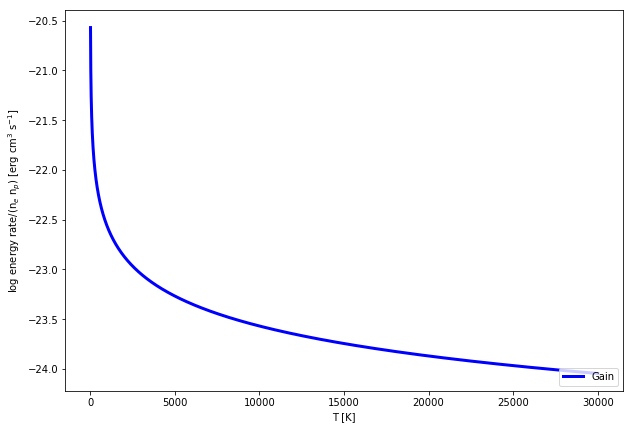

In [5]:
f, ax = plt.subplots(figsize=(10, 7))
plot_Gain(ax=ax)
# We add some characteristics to the plot
ax.set_xlabel('T [K]')
ax.set_ylabel(r'log energy rate/(n$_e$ n$_p$) [erg cm$^3$ s$^{-1}$]') # 
ax.legend(loc=4);

### Compute the energy losses due to H recombination and to H free-free radiation as a function of Te and plot them, together with their sum, in the same diagram.

##### We define some functions to answer the question.

In [6]:
def Lff(Te): 
    # H free-free losses
    Z = 1
    gff = 1.3
    #formula for loss due to free-free radiation
    #Lff =  (32. * np.pi * pn.CST.ECHARGE**6 * Z**2 / 
    #        (3.**(1.5) * pn.CST.HPLANCK * pn.CST.EMASS * pn.CST.CLIGHT**3) *
    #        (2 * np.pi * pn.CST.BOLTZMANN * Te / pn.CST.EMASS)**0.5 * gff)
    
    Lff = 1.42e-27 * Z**2 * Te**0.5 * gff
    return Lff

def beta_B(Te):
    # Energy averaged recomb. coeff.
    # We assume beta = alpha, 
    return alpha_B(Te)

def Lrec(Te):
    # H losses due to recombination losses
    return  pn.CST.BOLTZMANN * Te * beta_B(Te)

def LtotalH(Te):
    # total H losses (collisional excitation of Lya not considered)
    return Lrec(Te) + Lff(Te)

def plot_LossH(ax=None):
    # plot H energylosses
    if ax is None:
        f, ax = plt.subplots()
    ax.plot(tem, np.log10(Lff(tem)), label='H Free-Free loss', color='black', linestyle='--')
    ax.plot(tem, np.log10(Lrec(tem)), label='H recomb. loss', color='black')
    ax.plot(tem, np.log10(LtotalH(tem)), label='TOTAL H-loss', linewidth=3, color='black')

##### We make a plot using the previously defined functions.

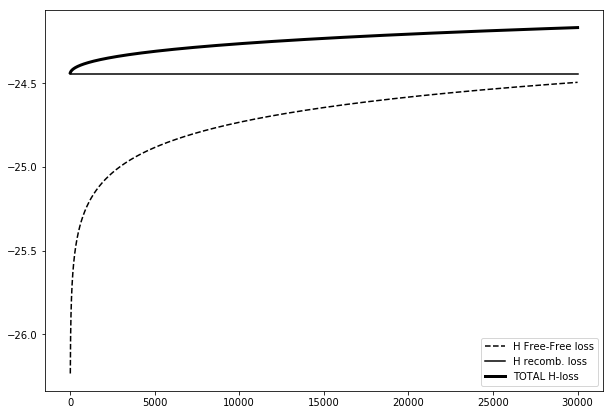

In [7]:
f, ax = plt.subplots(figsize=(10, 7))
plot_LossH(ax=ax)
# Adding a legend in the lower-right corner
ax.legend(loc=4)

### Compute the energy losses in the O$^{++}$ region of each of the oxygen line and plot them in a diagram for an oxygen abundance O/H= 4 x 10$^{-4}$.

In [8]:
def plot_LossO(atom, OoH=4e-4, den=1e2, ax=None):
    # energylosses due to O3 for an abundance O/H of 4e-4
    # O3 has been defined at the beginning as 
    #      O3 = pn.Atom('O', 3, OmegaInterp='Linear')
    print(atom)
    atom.plotEmiss(den=den, ionic_abund=OoH, plot_total = True, legend=True, 
                   total_color='green', ax=ax)

In [9]:
def plot_Loss(atom, OoH=4e-4, den=1e2, onlyTotal=False, linestyle='-', ax=ax):

    if ax is None:
        f, ax = plt.subplots()

    total_Hloss = LtotalH(tem)
    
    total_loss = total_Hloss.copy() # !!!Don't use total_loss = total_Hloss!!!
    for wave in atom.lineList:
        # adds the losses for all the lines of O3 
        total_loss += OoH * atom.getEmissivity(tem, den, wave=wave) 
        
    ax.plot(tem, np.log10(total_loss), color='red', label = 'TOTAL loss', linewidth=3, 
             linestyle=linestyle)
    if not onlyTotal:
        plt.plot(tem, np.log10(total_Hloss), label='TOTAL H-loss', linewidth=1, color='black')
        atom.plotEmiss(den=den, ionic_abund=OoH, plot_total=True, plot_only_total=True, 
                   legend=True, total_color='green', total_label='TOTAL O-loss', ax=ax)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


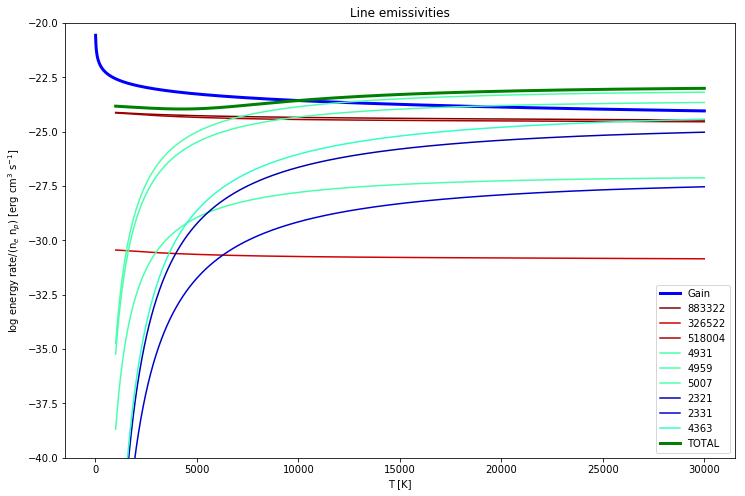

In [10]:
f, ax = plt.subplots(figsize=(12, 8))

plot_Gain(ax=ax)
plot_LossO(atom, ax=ax)

ax.set_xlabel('T [K]')
ax.set_ylabel(r'log energy rate/(n$_e$ n$_p$) [erg cm$^3$ s$^{-1}$]') 
ax.legend(loc=4)
ax.set_ylim((-40, -20)) ;

### Plot in a separate diagram the energy gains, the H losses, the O$^{++}$ losses, and the total losses. Find the resulting electron temperature.

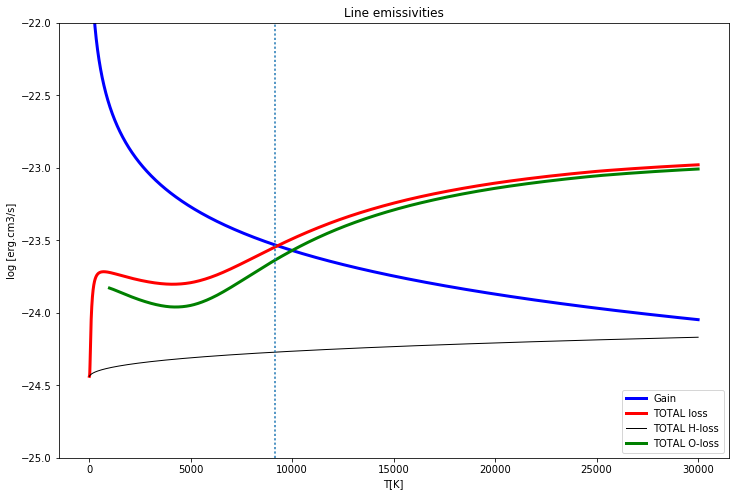

In [13]:
f, ax = plt.subplots(figsize=(12, 8))
plot_Gain(ax=ax)
plot_Loss(atom, ax=ax)
ax.set_ylim((-25, -22))

# By trial and error, we can determin the equilibrium Te
Teq = 9145
# plots a vertical dotted line
ax.plot([Teq, Teq], [-25, -22], linestyle=':') 

### ??? By trial and error find by how much does one need to change the oxygen abundance to increase the temperature by 2000K? To decrease it by 2000K?

In [ ]:
atom.plotEmiss??

(-25, -21)

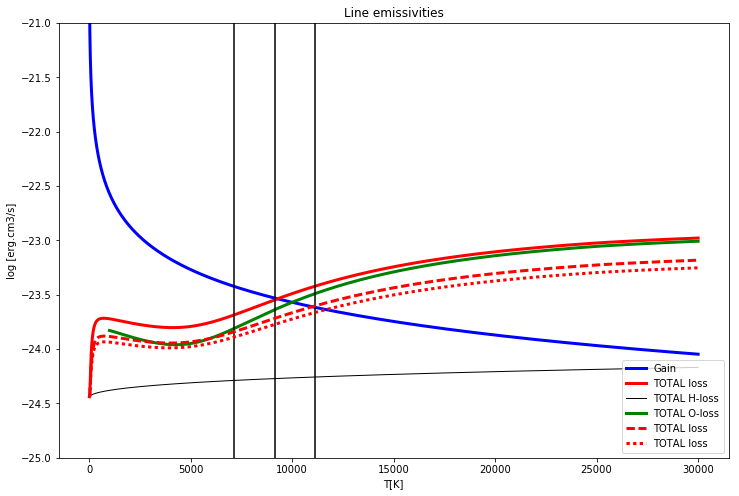

In [15]:
f, ax = plt.subplots(figsize=(12, 8))
plot_Gain(ax=ax)
plot_Loss(atom, ax=ax)
ax.plot((Teq, Teq), (-25, -21), color='black')
ax.plot((Teq - 2000, Teq - 2000), (-25, -21), color='black')
ax.plot((Teq + 2000, Teq + 2000), (-25, -21), color='black')
plot_Loss(atom, OoH=2.4e-4, onlyTotal=True, linestyle='--', ax=ax)
plot_Loss(atom, OoH=2e-4, onlyTotal=True, linestyle=':', ax=ax)
ax.legend(loc=4)
ax.set_ylim((-25, -21))

### ??? Alternatively, what change in T* is needed to produce the same effect?

In [ ]:
atom = pn.Atom('O', 3)
Teq = 9145
f, ax = plt.subplots(figsize=(12, 8))
plot_Gain(ax=ax)
plot_Loss(atom, ax=ax)
ax.plot((Teq, Teq), (-25, -21), color='black')
ax.plot((Teq - 2000, Teq - 2000), (-25, -21), color='black')
ax.plot((Teq + 2000, Teq + 2000), (-25, -21), color='black')
plot_Gain(27000, linestyle='--', ax=ax)
plot_Gain(80000, linestyle=':', ax=ax)
ax.legend(loc=4)
ax.set_ylim((-25, -21))

### Repeat the whole procedure for the O$^+$ zone.

In [ ]:
atom_o2 = pn.Atom('O',2)

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
atom_o2.plotGrotrian(ax=ax)

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))

plot_Gain(ax=ax)
plot_LossO(atom_o2, ax=ax)

ax.set_xlabel('T [K]')
ax.set_ylabel(r'log energy rate/(n$_e$ n$_p$) [erg cm$^3$ s$^{-1}$]') 
ax.legend(loc=4)
ax.set_ylim((-40, -20))

In [ ]:

f, ax = plt.subplots(figsize=(10, 6))
plot_Gain(ax=ax)
plot_Loss(atom_o2, ax=ax)
ax.set_ylim((-25, -22))

# With trial and error, we can determin the equilibrium Te
Teq = 10800
# plots a vertical dotted line
ax.plot([Teq, Teq], [-25, -22], linestyle=':') 

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
plot_Gain(ax=ax)
plot_Loss(atom_o2, ax=ax)
ax.plot((Teq, Teq), (-25, -21), color='black')
ax.plot((Teq - 2000, Teq - 2000), (-25, -21), color='black')
ax.plot((Teq + 2000, Teq + 2000), (-25, -21), color='black')
plot_Loss(atom_o2, OoH=2.0e-4, onlyTotal=True, linestyle='--', ax=ax)
plot_Loss(atom_o2, OoH=1.1e-3, onlyTotal=True, linestyle=':', ax=ax)
ax.legend(loc=4)
ax.set_ylim((-25, -21))

### ??? Comment on the comparison between the O$^{++}$ and O$^+$ zone.   In a real nebula, what changes would you expect with respect to this simple toy model?

In [ ]:
# the following is to have the nice style.
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()